# Домашнее задание 5

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_5

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

__(а)__ Для такой задачи симулируем итерацию SGD:
$$
x^{k+1} = x^k - \gamma (\nabla f(x^k) + \xi^k),
$$
где $\xi^k$ - независимая от $x^k$ случайная величина из нормального распределения $\mathcal{N}(0, 100)$.

Для такого метода с $\gamma = \frac{1}{L}$ постройте график сходимости (критерий $\| \nabla f(x^k)\|^2$). Постройте на этом же графике сходимость честного градиентного спуска c $\gamma = \frac{1}{L}$. Сделайте вывод о характере сходимости нового метода.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

from importlib import reload
import HW_5
reload(HW_5)
from HW_5 import MyLinearRegression

In [2]:
#@title Генерация матрицы
#ответ
def generate_matrix(d, mu, L):
    """
    Функция генерации симметричной квадратной матрицы(d, d),
    с минимальным собственным числом mu, и нормой матрицы L.

    Inputs:
    - d     : размер матрицы 
    - mu    : минимальное собственное число в матрице
    - L     : норма матрицы    
    
    Returns:
    Сгенерированную матрицу.
    """
    tmp = np.random.rand(d, d)  # генерим случайную матрицу
    tmp = tmp + tmp.T           # делаем её симметричной
    u, s, vh = la.svd(tmp)      # раскладываем по svd
    
    s = s - np.amin(s) + mu     # вычитаем минимальный элемент и прибавляем желаемое значение mu
    s[0] = L

    D = np.diag(s)
    A = u.T @ D @ u

    return A

def plot_models_error(*args):
    _, ax = plt.subplots(1, 2, figsize=(21, 7))
    
    ax[0].set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
    ax[0].set_xlabel("Номер итерации")
    ax[0].set_ylabel("Логарифм ошибки")

    ax[1].set_title("Логарифм ошибки от времени ($error = || \\nabla f(w) ||$)")
    ax[1].set_xlabel("Время, с")
    ax[1].set_ylabel("Логарифм ошибки")
    
    
    for model in args:
        step = model.get_step()

        y = np.array(model.get_errors())
        x = np.linspace(0, step * len(y), len(y))
        ax[0].plot(x, np.log(y), label=model.get_name())
        x = np.array(model.get_time())
        ax[1].plot(x, np.log(y), label=model.get_name())
    
    legend_box = ax[1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")



def plot_models_acc_error(*args):
    _, ax = plt.subplots(2, 2, figsize=(14, 12))

    ax[0, 0].set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
    ax[0, 0].set_xlabel("Номер итерации")
    ax[0, 0].set_ylabel("Логарифм ошибки")
    
    ax[0, 1].set_title("Логарифм ошибки от времени ($error = || \\nabla f(w) ||$)")
    ax[0, 1].set_xlabel("Время, с")
    ax[0, 1].set_ylabel("Логарифм ошибки")
    
    ax[1, 0].set_title("Точность от номера итерации")
    ax[1, 0].set_xlabel("Номер итерации")
    ax[1, 0].set_ylabel("Точность")
    
    ax[1, 1].set_title("Точность от времени")
    ax[1, 1].set_xlabel("Время, с")
    ax[1, 1].set_ylabel("Точность")

    for model in args:
        step = model.get_step()

        y = np.array(model.get_errors())
        x = np.linspace(step, step * len(y), len(y))
        ax[0, 0].plot(x, np.log(y), label=model.get_name())
        x = np.array(model.get_time())
        ax[0, 1].plot(x, np.log(y), label=model.get_name())

        y = np.array(model.get_accuracy())
        x = np.linspace(step, step * len(y), len(y))
        ax[1, 0].plot(x, y, label=model.get_name())
        x = np.array(model.get_time())
        ax[1, 1].plot(x, y, label=model.get_name())


    legend_box = ax[1, 1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[1, 0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0, 1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0, 0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

In [3]:
# Параметры задачи минимизации
d = 100
mu = 1
L = 1000
b = np.random.randn(d)
A = generate_matrix(d, mu, L)

In [4]:
# Обучение моделей

model_sgd = MyLinearRegression(stochastic=True, name="SGD")
model_sgd.fit(A, b)

model_dt = MyLinearRegression(stochastic=False, name="GD")
model_dt.fit(A, b)

model_sgdv = MyLinearRegression(stochastic_vector=True, name="SGDV")
model_sgdv.fit(A, b)

model_sgd_decreasing = MyLinearRegression(stochastic=True, name="SGD, $\Gamma = \\frac{1}{kL}$", decreasing_lr=True)
model_sgd_decreasing.fit(A, b)

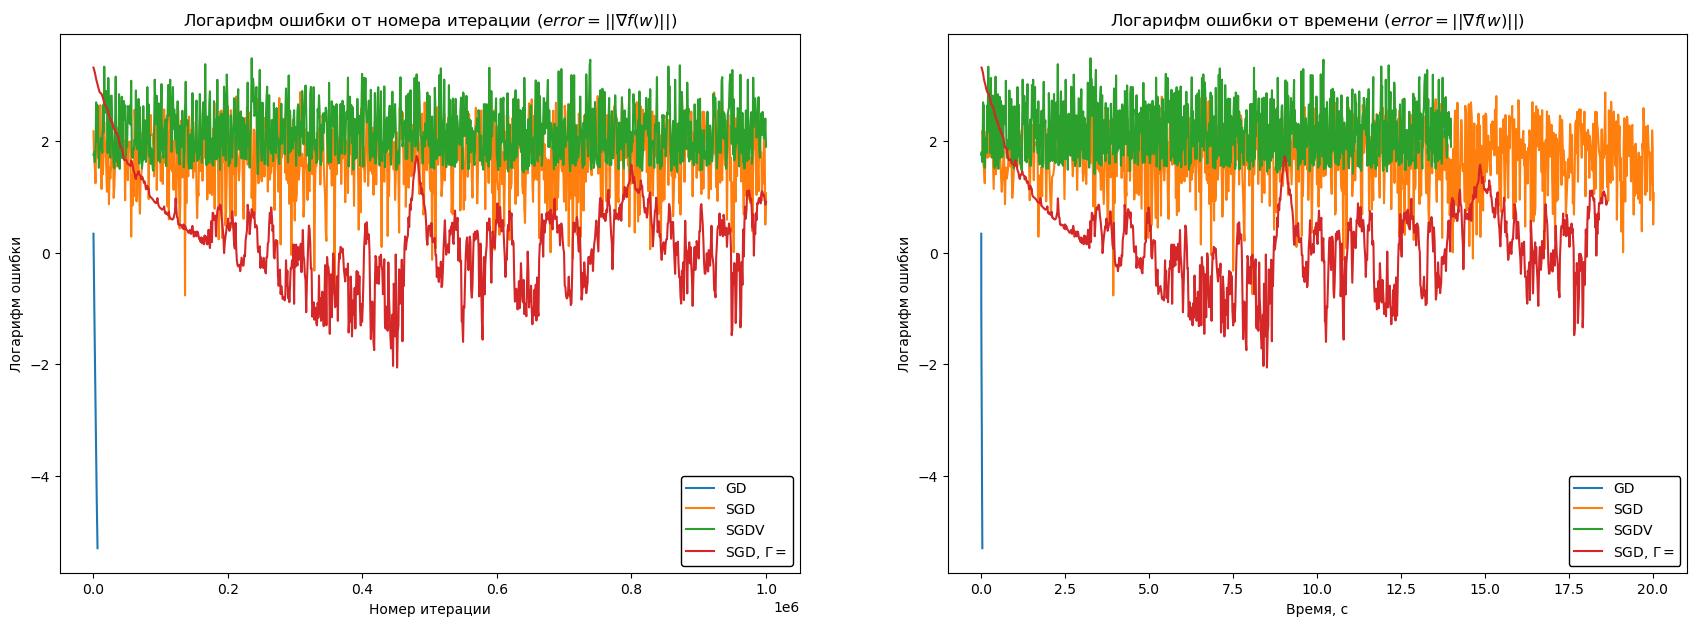

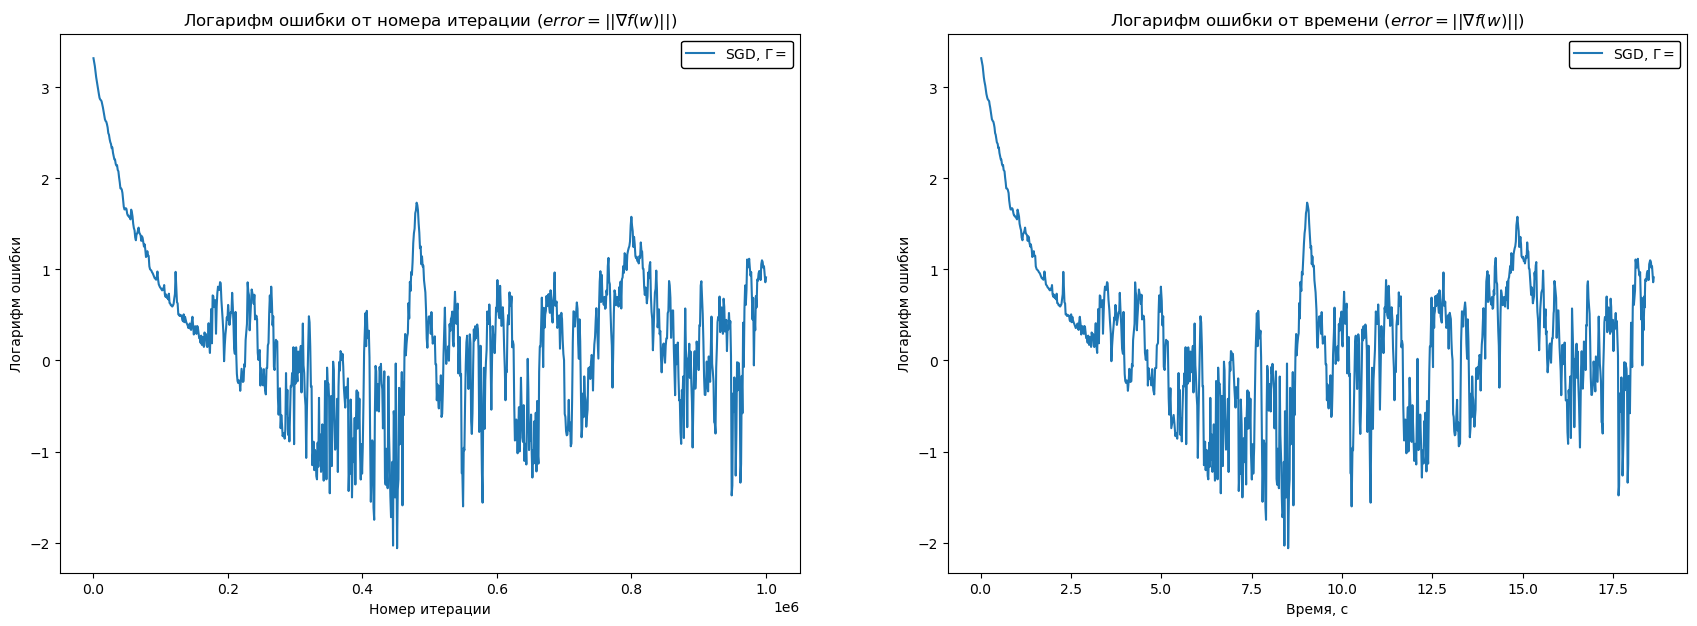

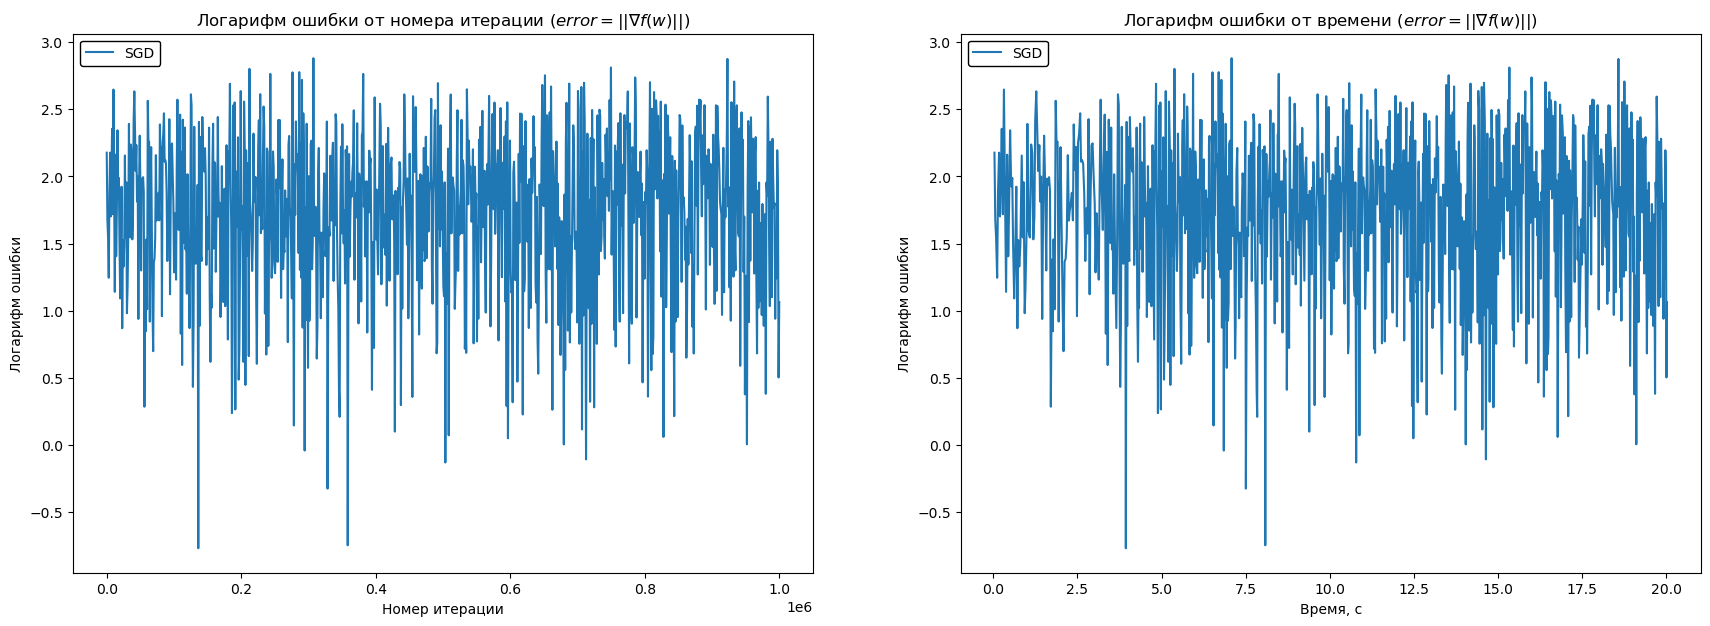

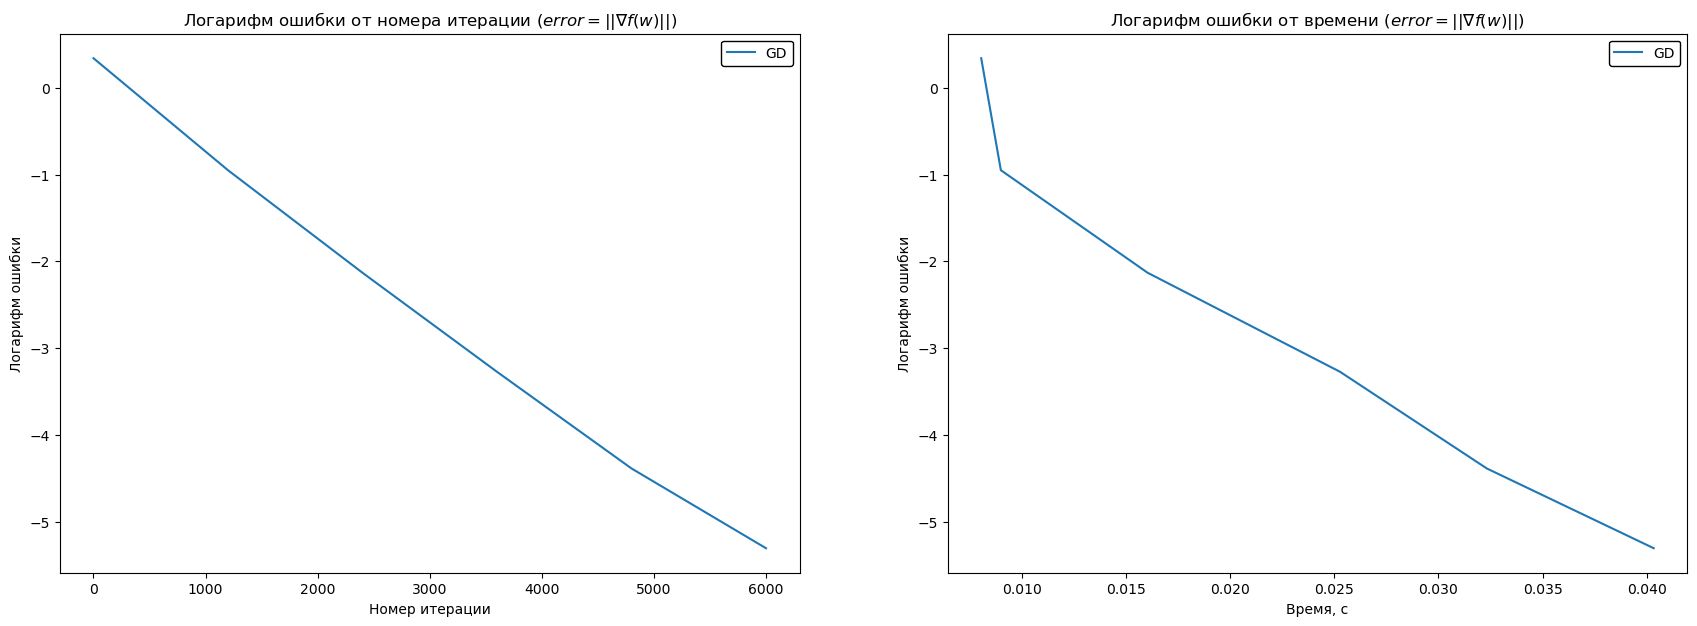

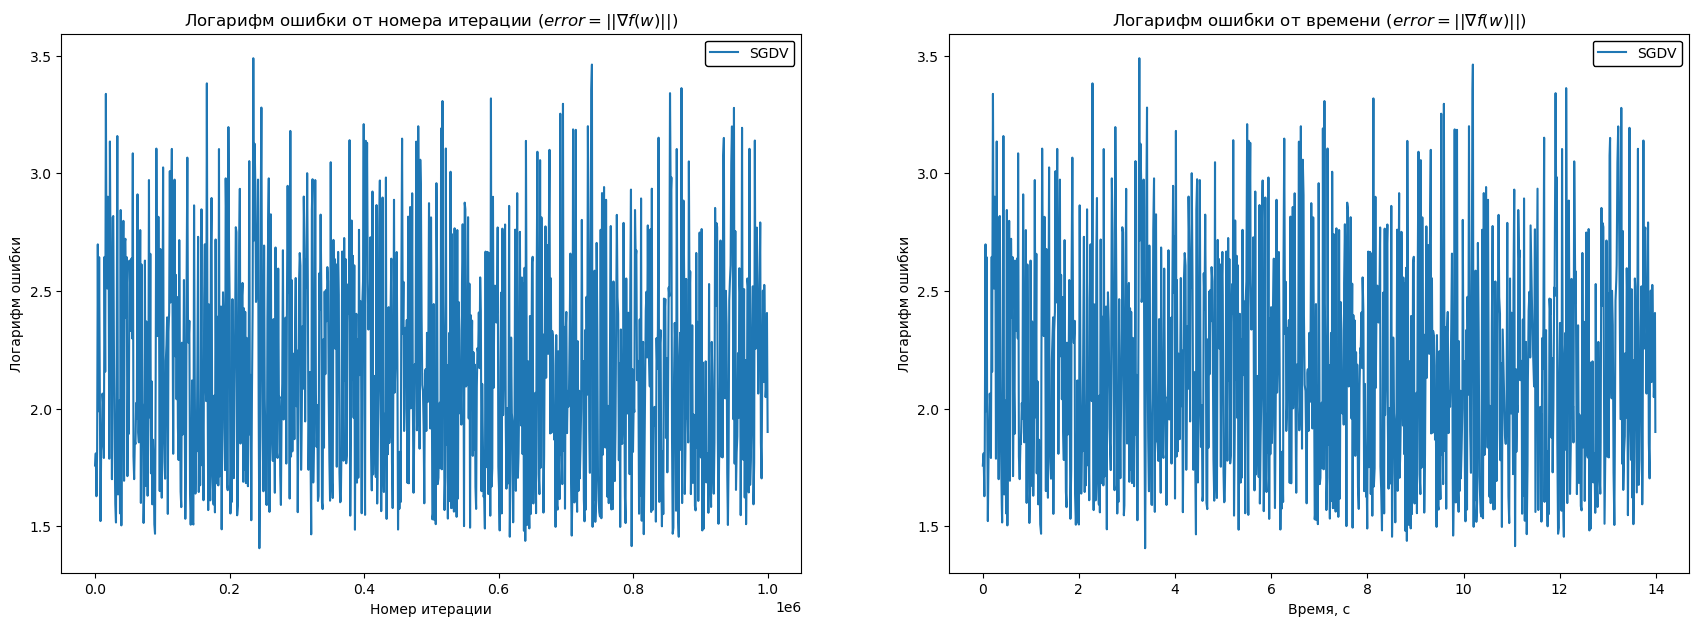

In [5]:
plot_models_error(model_dt, model_sgd, model_sgdv, model_sgd_decreasing)
plot_models_error(model_sgd_decreasing)
plot_models_error(model_sgd)
plot_models_error(model_dt)
plot_models_error(model_sgdv)

## Вывод:
Если реализовать случайную величину как случайный вектор, то метод схотастического градиента не сходится, но если реализовать как случайную величину умножить на единичный, то метод сходится, но за большее количество шагов и медленее и только до порядка $10^{-1}$, чем градиентный спуск.

Реализация изменяющего learning rate дает выигрыш, только если его рестартить каждый 1000 итераций, а иначе он быстро сходится к нулю и ничего не дает.

__(б)__ На семинаре обсуждались способы борьбы со "стохастичностью" сходимости градиентного спуска. В частности, мы затронули использование уменьшающегося шага (смотри, например, Теорему 5 из [работы](https://arxiv.org/pdf/1907.04232.pdf)), а также использование батчирования (в нашем случае это просто замена: $\xi^k \to \frac{1}{b} \sum\limits_{i=1}^b \xi^k_i$, где $\xi^k_i \in \mathcal{N}(0, 100)$ и независимы). Реализуйте эти модификации (для батчирования возьмите $b = 10 , 100$). Добавьте полученные результаты на график сходимости из пункта (а). Постройте также график сходимости, где по оси $x$ будет не количество итераций, а количество генераций $\xi^k_i$ (количество вызовов стохастического градиента).

In [6]:
model_batch10 = MyLinearRegression(name="SGD + batch10", batch=True, batch_size=10)
model_batch10.fit(A, b)

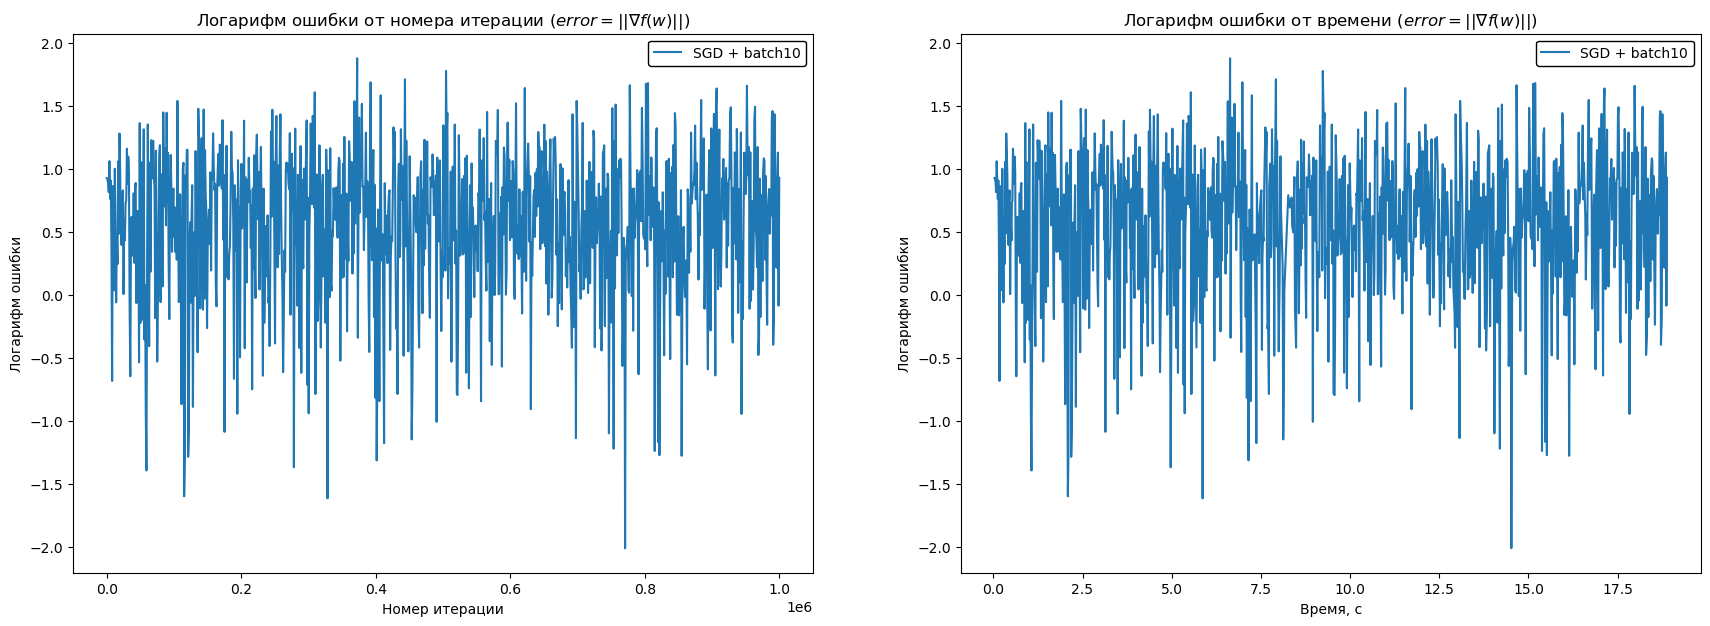

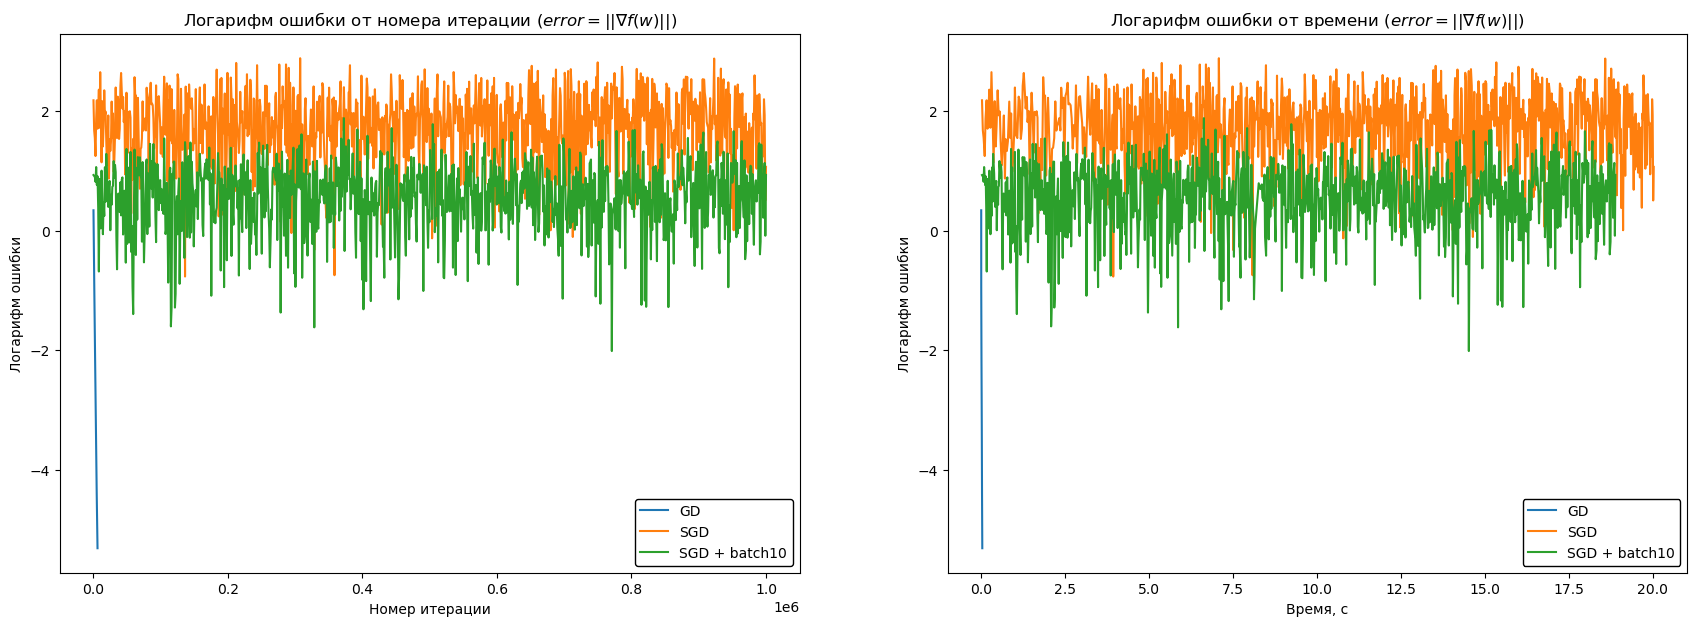

In [7]:
plot_models_error(model_batch10)
plot_models_error(model_dt, model_sgd, model_batch10)

In [8]:
model_batch100 = MyLinearRegression(name="SGD + batch100", batch=True, batch_size=100)
model_batch100.fit(A, b)

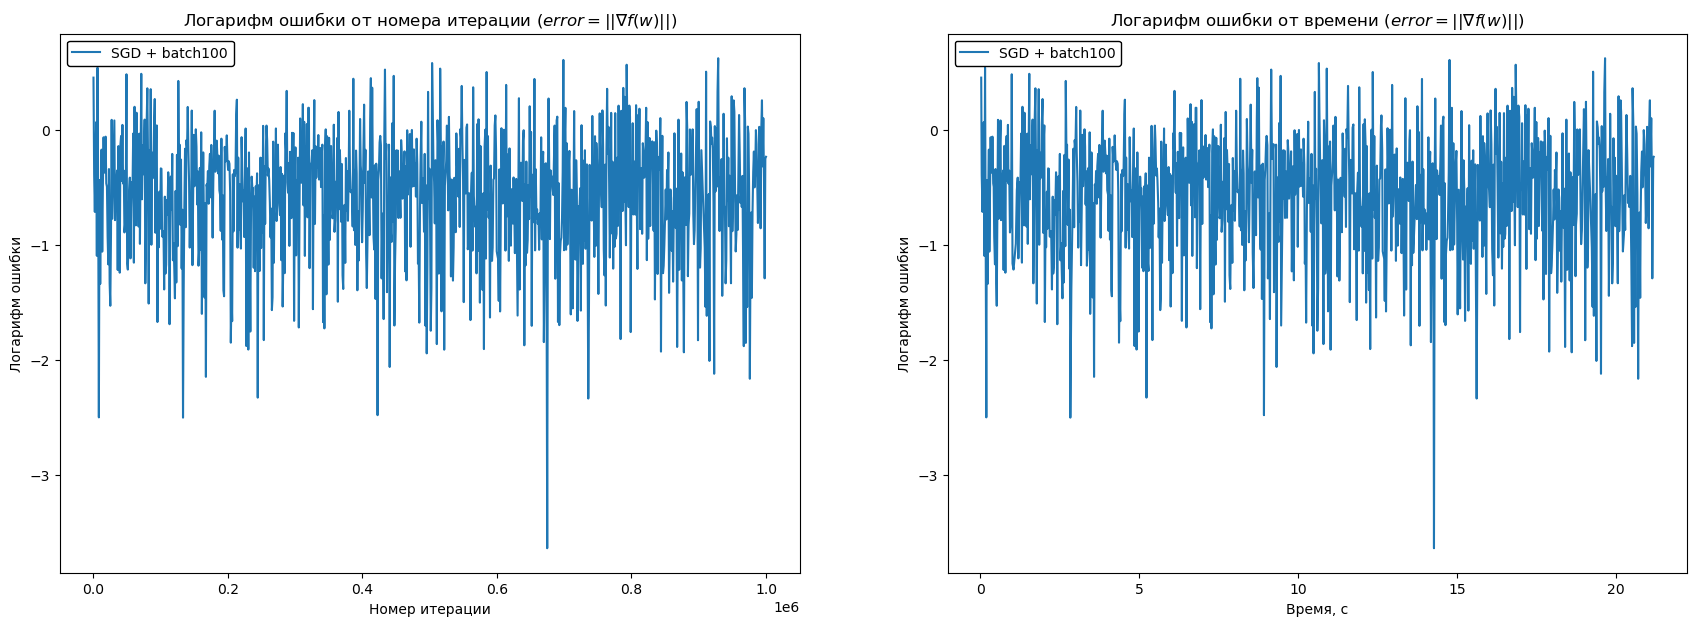

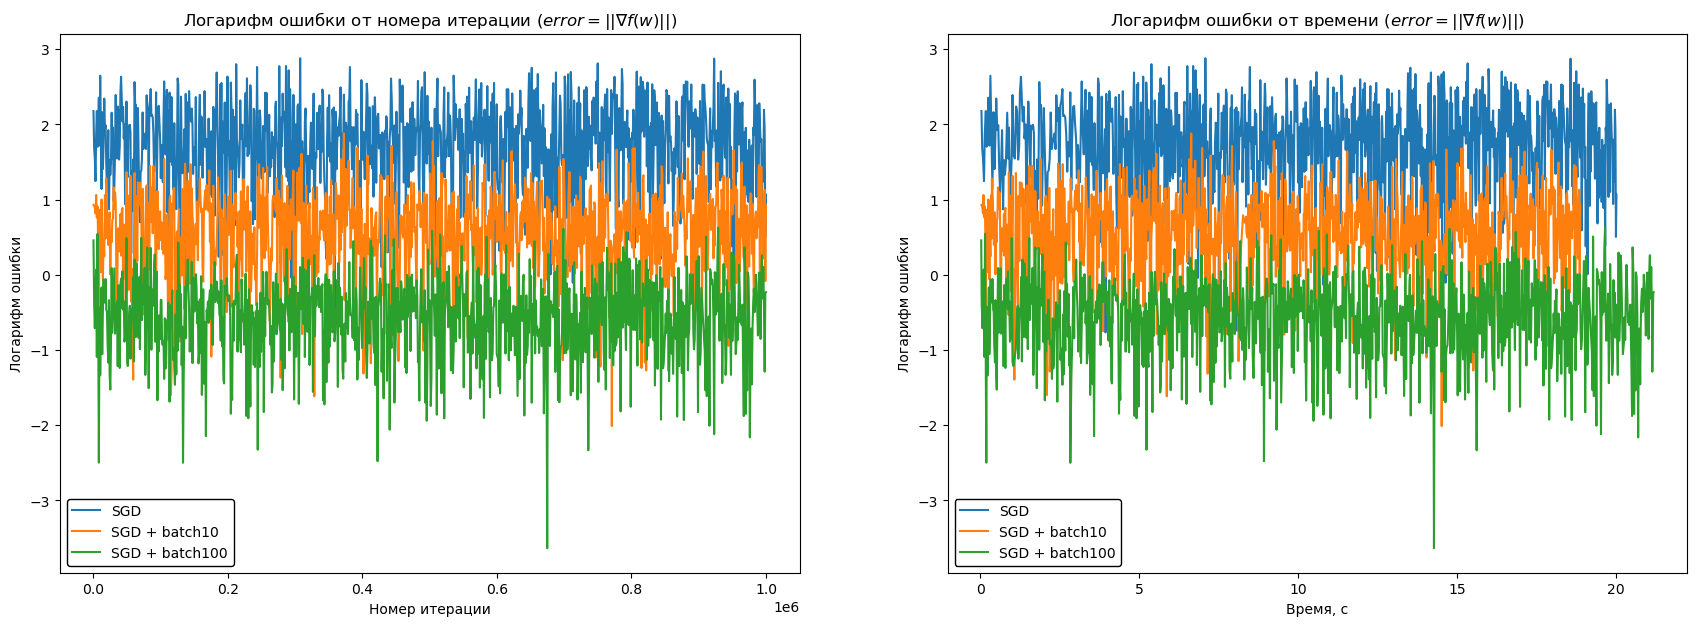

In [9]:
plot_models_error(model_batch100)
plot_models_error(model_sgd, model_batch10, model_batch100)

## Вывод:
Добавление батча улучшает сходимость данного метода, но не позволяет сойтись до порядка $10^{-3}$, заметное улучшение вносит уменьшение сигмы из нормального распределения, которому принадлежит случайная величина.

## Задача 2

Рассмотрим задачу логистической регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). Как мы знаем, эта задача имеет вид конечной суммы:
\begin{equation}
\min_{w \in \mathbb{R}^d} f(w) := \frac{1}{N} \sum\limits_{j=1}^N f_j(w) := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b f_{ji}(w)\right] := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b l (g(w, x_i), y_i)\right],
\end{equation}
где $nb = N$ - полный размер выборки. Решите данную задачу с помощью SGD, SAGA (секция А.5 из [работы](https://arxiv.org/pdf/1905.11261.pdf)), SVRG (секция А.9 из [работы](https://arxiv.org/pdf/1905.11261.pdf)) и SARAH ([работа](https://arxiv.org/pdf/1703.00102.pdf)). 

__(а)__ Оцените $\mu$ и $L$ для данной задачи. Обратите внимание, что теория для SAGA, SVRG, SARAH предполагает, что $L$ - это константа Липшица градиентов $\nabla f_j$. 

Константу Липшица L градиентов мы можем оценить, как в 3-м задании, а именно, посчитаем $\nabla^2 f_i$:

$$
\nabla^2 f_i = \frac{x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2} \exp(y_i \cdot (w^T x_i))
$$

Тогда:
\begin{equation}
\nabla^2 f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{y_i^2 \cdot x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2} \exp(y_i \cdot (w^T x_i))
\end{equation}

Оценим l (константа липшица для функции f(x)) следующим образом, учитывая, что $\frac{\exp(x)}{(1+\exp(x))^2} \leq \frac{1}{4}$:
$$
l \geq \lambda_{max} \left( \frac{1}{4n} \sum\limits_{i=1}^n x_i x_i^T \right)
$$

Тогда оценка для L (для каждой $f_i$):
$$
L \geq \frac{b \cdot l}{n} \geq \lambda_{max} \left( \frac{b}{4n^2} \sum\limits_{i=1}^n x_i x_i^T \right)
$$

Оценить $\mu$ же можно разве,что нулем, т.к. $\frac{\exp(x)}{(1+\exp(x))^2}$ нельзя оценить снизу ничем кроме нуля.
Или мы можем взять любое маленькое число C меньше, которого  $C \leq \frac{\exp(x)}{(1+\exp(x))^2}$ не может быть (это наше предположение) и оценить mu, как:
$$
\mu \leq \frac{C}{n}\cdot \lambda_{min}(\sum\limits_{i=1}^nx_i x_i^T)
$$


__(б)__ Реализуйте SGD, SAGA, SVRG, SARAH для задачи логистической регресии из $n$ слагаемых, где каждое слагаемое так же имеет виды суммы размеры $b$. Каким надо взять $b$? Почему? Что об этом говорит теория? Как будете выбирать шаг и другие параметры методов?

Шаг L лучше подбирать, следующим образом (N = b * n):
$$
L \geq \frac{b}{N} \lambda_{max}(\sum\limits_{i=1}^Nx_i x_i^T)
$$

In [10]:
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
print(X.shape, y.shape)
y = y*2 - 3

(8124, 112) (8124,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
l2_coef = 0.05
b = 100

__(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество подсчетов $\nabla f_{ji}$, по оси $y$ - $\|\nabla f(w^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

In [62]:
from importlib import reload
import HW_5
reload(HW_5)
from HW_5 import MyLogisticRegression

In [ ]:
model_GD    = MyLogisticRegression(l2=False, name='gd', method='GD', )
model_GD.fit_test(X_train, y_train, X_test, y_test)

In [69]:
print(X_train.shape)

(6499, 112)


In [71]:
model_GD    = MyLogisticRegression(l2=True, name='gd', method='GD', batch_size=6499, iter=1000)
model_GD.fit_test(X_train, y_train, X_test, y_test)

Method(gd) Epoch[7/10], [error=74.7382, acc test=50.6, acc batch =52.1, acc train=52.1]:  80%|████████  | 8/10 [00:35<00:08,  4.49s/it] 

In [56]:
model_SGD   = MyLogisticRegression(l2=True, name='sgd', method='SGD', test=False)
model_SGD.fit_test(X_train, y_train, X_test, y_test)

In [44]:
model_SAGA  = MyLogisticRegression(l2=True, name='saga', method='SAGA', test=False)
model_SAGA.fit_test(X_train, y_train, X_test, y_test) 

In [51]:
model_SVRG  = MyLogisticRegression(l2=True, name='svrg', method='SVRG', eps=1e-3)
model_SVRG.fit_test(X_train, y_train, X_test, y_test) 

In [46]:
model_SARAH = MyLogisticRegression(l2=True, l2_coef=0.00001, name='sarah', method='SARAH')
model_SARAH.fit_test(X_train, y_train, X_test, y_test)

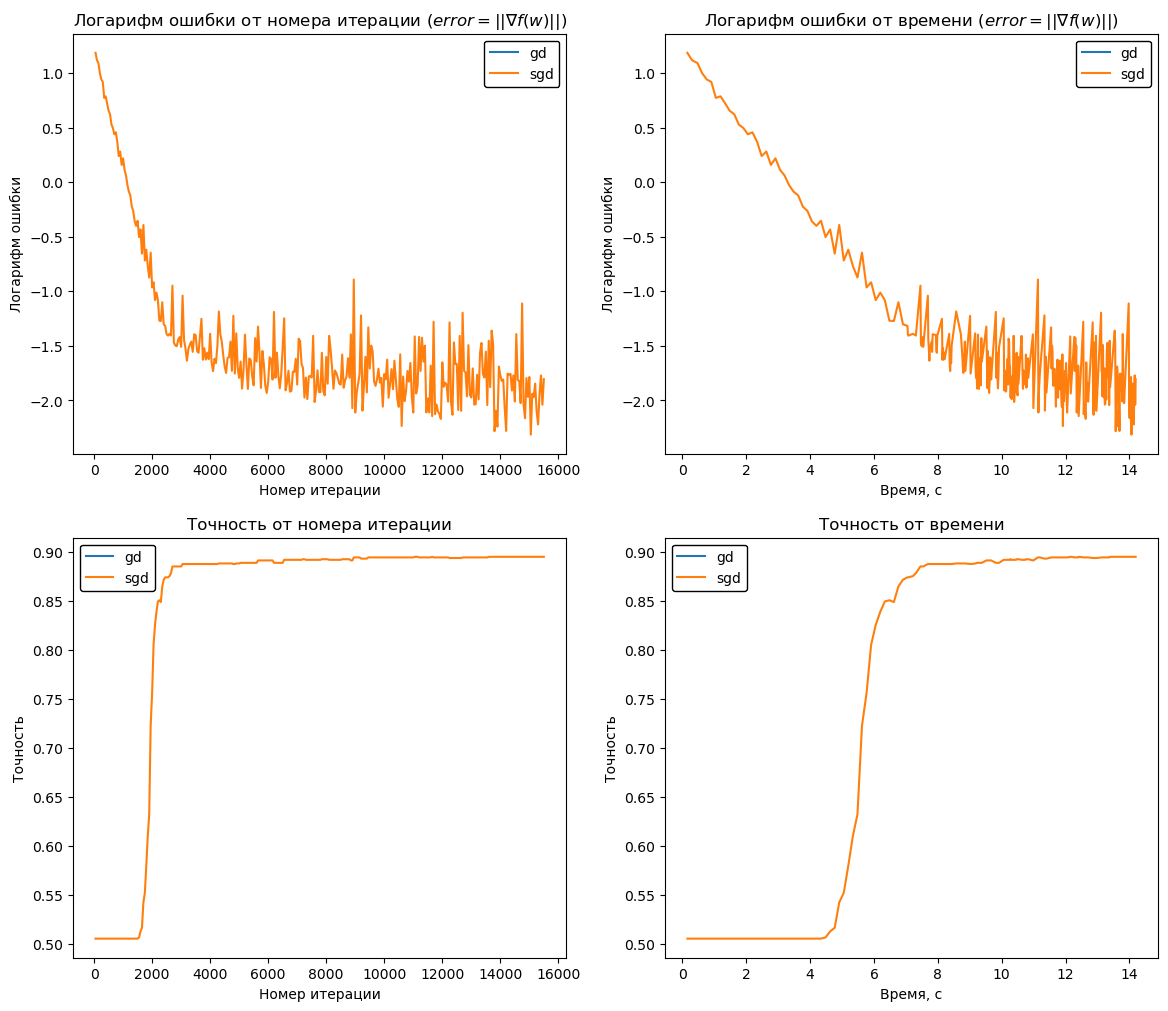

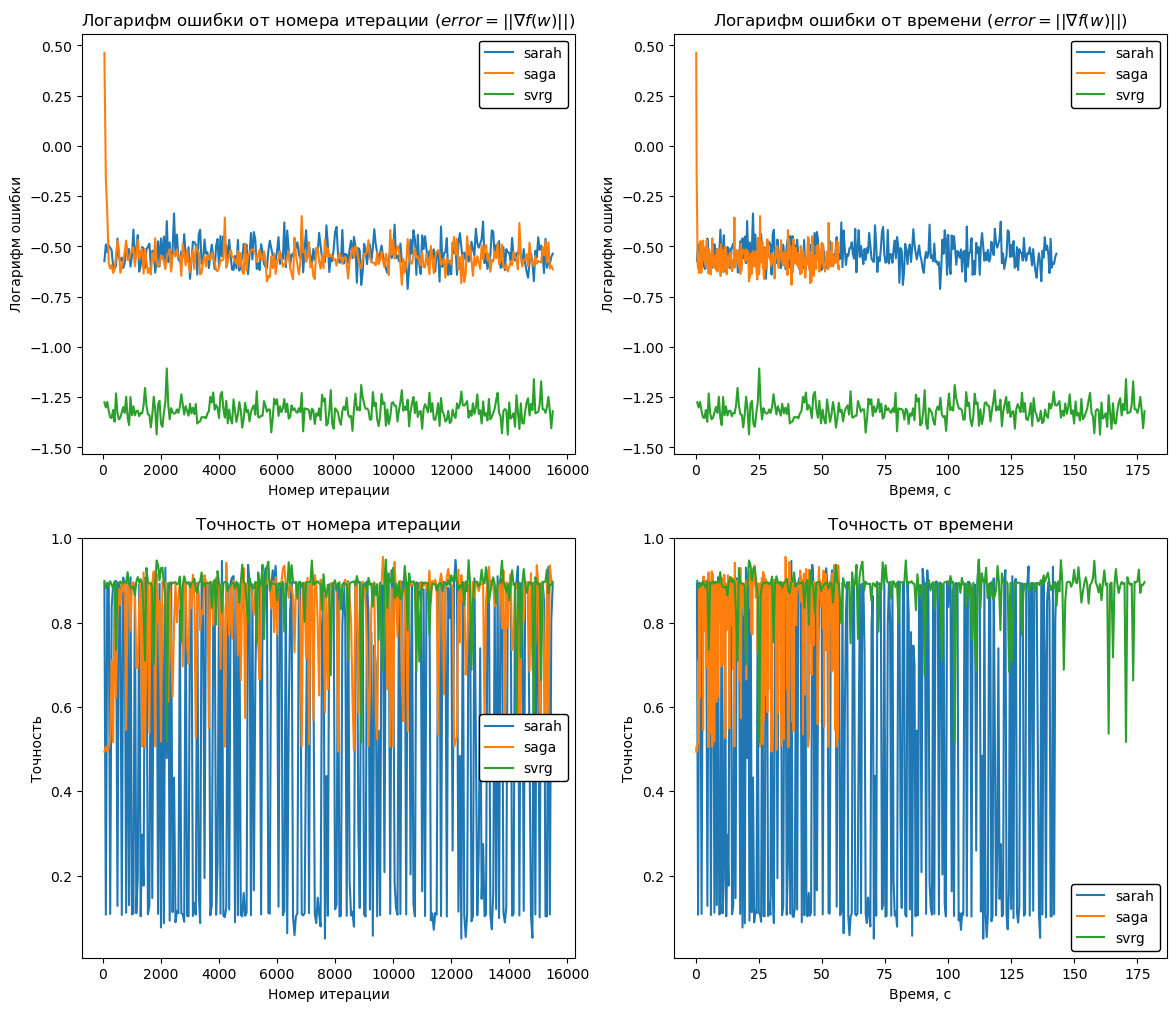

In [66]:
plot_models_acc_error(model_GD, model_SGD)
plot_models_acc_error(model_SARAH, model_SAGA, model_SVRG)

## Вывод: 
Методы не сходятся, точнее сходятся, а потом не сходятся в начале нового цикла не сходятся, видимо зависит от воли случая.
Пофиксить этот баг до дедлайна я не успел.

__Бонусные пункты__

__(г)__ Методы SGD, SAGA, SVRG, SARAH, которые мы рассматривали, предполагают случайный выбор индекса на каждой итерации. Но между тем, на практике обычно делают по-другому и просто последовательно меняют $i_k$ от $1$ до $n$ (а потом заново). В [работе](https://arxiv.org/abs/2006.05988) изучаются такие подходы. Реализуйте Random Reshuffling и Shuffle Once для SGD и SARAH. Сравните новые алгоритмы со старыми версиями SGD и SARAH из пунктов (б) и (в).

In [ ]:
#ответ

__(д)__ Методы SVRG и SARAH имеют loopless версии: L-SVRG (секция А.10 из [работы](https://arxiv.org/pdf/1905.11261.pdf) и PAGE ([работа](https://proceedings.mlr.press/v139/li21a.html)), соотвественно. Реализуйте их. Как будете выбирать вероятности в этих алгоритмах? Сравните новые алгоритмы со старыми версиями SVRG и SARAH из пунктов (б) и (в).

In [ ]:
#ответ